In [1]:
import seaborn as sns
import pandas as pd

running_backs = pd.read_csv("../../data/raw/running_backs.csv")

In [2]:
running_backs.head()

,Unnamed: 0,playerid,year,playername,team,age,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
0,0,AAbduAm00,2020,Ameer Abdullah,MIN,27,6,0,2,7,0,4,3.5,1.2,0
1,1,AAbduAm00,2019,Ameer Abdullah,MIN,26,16,0,23,115,0,15,5.0,7.2,1
2,2,AAbduAm00,2017,Ameer Abdullah,DET,24,14,11,165,552,4,34,3.3,39.4,2
3,3,AAbduAm00,2016,Ameer Abdullah,DET,23,2,2,18,101,0,24,5.6,50.5,0
4,4,AAbduAm00,2015,Ameer Abdullah,DET,22,16,9,143,597,2,36,4.2,37.3,5


Obvious relation between attempst and yards:

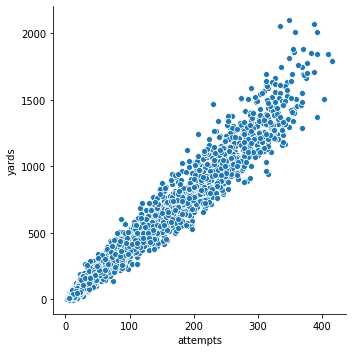

In [3]:
sns.relplot(
    data=running_backs,
    x="attempts", y="yards"
)

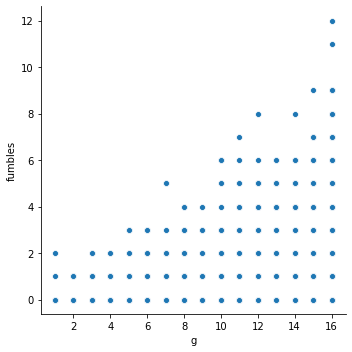

In [4]:
sns.relplot(
    data=running_backs,
    x="g", y="fumbles"
)

Yards per attempt averages out to around 4.5:

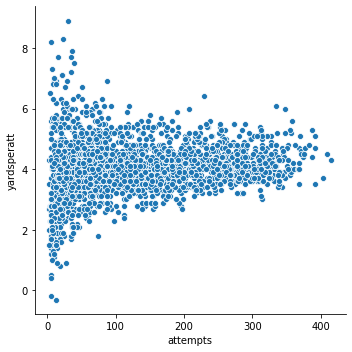

In [5]:
sns.relplot(
    data=running_backs,
    x="attempts", y="yardsperatt"
)

In [87]:
import numpy as np

combined_players = pd.DataFrame(columns=[
    "playerid", 
    "playername", 
    "g", 
    "gs", 
    "attempts", 
    "yards", 
    "tds", 
    "longgain", 
    "yardsperatt", 
    "yardspergame", 
    "fumbles"
])

for playerid, df in running_backs.groupby("playerid"):
    combined_players = combined_players.append(dict(zip(list(combined_players.columns),[
        playerid,
        list(df['playername'])[0],
        df['g'].sum(),
        df['gs'].sum(),
        df['attempts'].sum(),
        df['yards'].sum(),
        df['tds'].sum(),
        np.max(df['longgain']),
        (np.dot(df['attempts'], df['yardsperatt']) / np.sum(df['attempts'])),
        (np.dot(df['g'], df['yardspergame']) / np.sum(df['g'])),
        df['fumbles'].sum()
    ])), ignore_index=True)
    

    
combined_players.head()

,playerid,playername,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
0,AAbduAm00,Ameer Abdullah,54,22,351,1372,6,36,3.897151,25.403704,8
1,AAbduKa00,Karim Abdul-Jabbar,60,52,1003,3413,33,45,3.415852,56.903333,9
2,AAdamJo03,Josh Adams,19,5,131,531,4,29,4.092366,27.947368,1
3,AAddaJo00,Joseph Addai,78,60,1095,4453,39,46,4.077626,57.103846,7
4,AAjayJa00,Jay Ajayi,45,23,572,2546,13,71,4.455070,56.595556,8


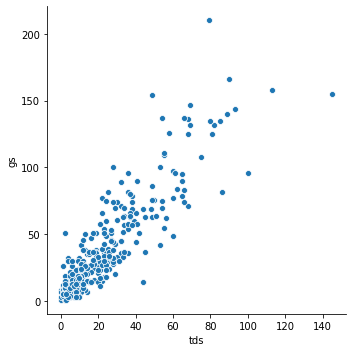

In [7]:
sns.relplot(
    data=combined_players,
    x="tds", y="gs"
)

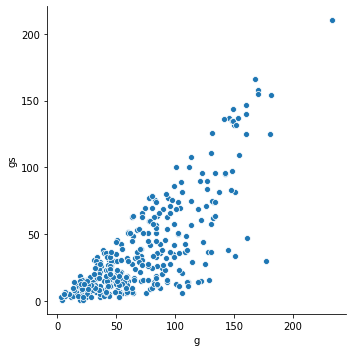

In [8]:
sns.relplot(
    data=combined_players,
    x="g", y="gs"
)

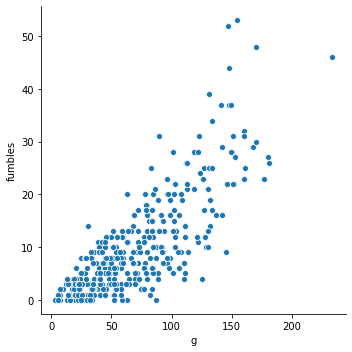

In [9]:
sns.relplot(
    data=combined_players,
    x="g", y="fumbles"
)

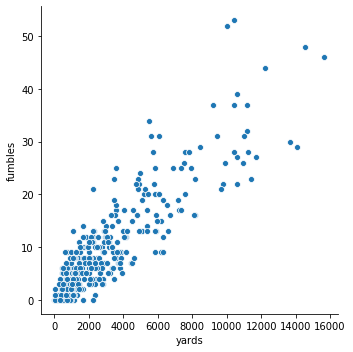

In [12]:
sns.relplot(
    data=combined_players,
    x="yards", y="fumbles"
)

In [13]:
sns.relplot(
    data=combined_players,
    x="yards", y="yardsperatt
"
)

SyntaxError: EOL while scanning string literal (<ipython-input-13-61e31c1be4ab>, line 3)

In [14]:
running_backs.head()

,Unnamed: 0,playerid,year,playername,team,age,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
0,0,AAbduAm00,2020,Ameer Abdullah,MIN,27,6,0,2,7,0,4,3.5,1.2,0
1,1,AAbduAm00,2019,Ameer Abdullah,MIN,26,16,0,23,115,0,15,5.0,7.2,1
2,2,AAbduAm00,2017,Ameer Abdullah,DET,24,14,11,165,552,4,34,3.3,39.4,2
3,3,AAbduAm00,2016,Ameer Abdullah,DET,23,2,2,18,101,0,24,5.6,50.5,0
4,4,AAbduAm00,2015,Ameer Abdullah,DET,22,16,9,143,597,2,36,4.2,37.3,5


In [15]:
running_backs["fumblespergm"] = running_backs["fumbles"] / running_backs["g"]

In [16]:
running_backs.head()

,Unnamed: 0,playerid,year,playername,team,age,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles,fumblespergm
0,0,AAbduAm00,2020,Ameer Abdullah,MIN,27,6,0,2,7,0,4,3.5,1.2,0,0.000000
1,1,AAbduAm00,2019,Ameer Abdullah,MIN,26,16,0,23,115,0,15,5.0,7.2,1,0.062500
2,2,AAbduAm00,2017,Ameer Abdullah,DET,24,14,11,165,552,4,34,3.3,39.4,2,0.142857
3,3,AAbduAm00,2016,Ameer Abdullah,DET,23,2,2,18,101,0,24,5.6,50.5,0,0.000000
4,4,AAbduAm00,2015,Ameer Abdullah,DET,22,16,9,143,597,2,36,4.2,37.3,5,0.312500


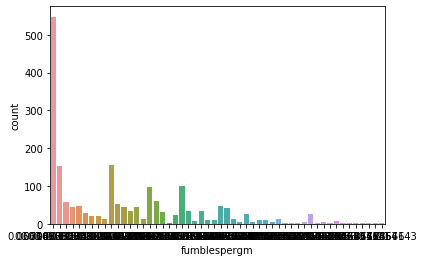

In [17]:
sns.countplot(x="fumblespergm", data=running_backs)

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


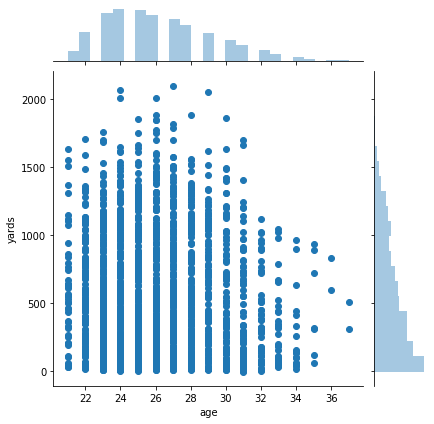

In [22]:
sns.jointplot(x='age',y='yards',data=running_backs)

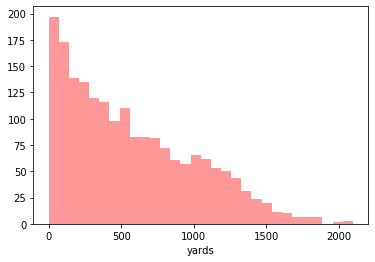

In [23]:
sns.distplot(running_backs['yards'],bins=30,kde=False,color='red')

Text(0.5, 1, 'running_backs.corr()')

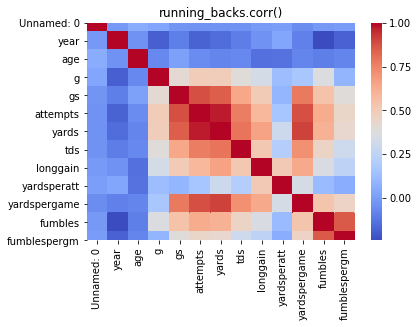

In [24]:
sns.heatmap(running_backs.corr(),cmap='coolwarm')
plt.title('running_backs.corr()')

In [25]:
combined_players.head()

,playerid,playername,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
0,AAbduAm00,Ameer Abdullah,54,22,351,1372,6,36,3.897151,25.403704,8
1,AAbduKa00,Karim Abdul-Jabbar,60,52,1003,3413,33,45,3.415852,56.903333,9
2,AAdamJo03,Josh Adams,19,5,131,531,4,29,4.092366,27.947368,1
3,AAddaJo00,Joseph Addai,78,60,1095,4453,39,46,4.077626,57.103846,7
4,AAjayJa00,Jay Ajayi,45,23,572,2546,13,71,4.455070,56.595556,8


In [26]:
career = combined_players

In [27]:
career.head()

,playerid,playername,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
0,AAbduAm00,Ameer Abdullah,54,22,351,1372,6,36,3.897151,25.403704,8
1,AAbduKa00,Karim Abdul-Jabbar,60,52,1003,3413,33,45,3.415852,56.903333,9
2,AAdamJo03,Josh Adams,19,5,131,531,4,29,4.092366,27.947368,1
3,AAddaJo00,Joseph Addai,78,60,1095,4453,39,46,4.077626,57.103846,7
4,AAjayJa00,Jay Ajayi,45,23,572,2546,13,71,4.455070,56.595556,8


In [28]:
career.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
playerid        350 non-null object
playername      350 non-null object
g               350 non-null object
gs              350 non-null object
attempts        350 non-null object
yards           350 non-null object
tds             350 non-null object
longgain        350 non-null object
yardsperatt     350 non-null float64
yardspergame    350 non-null float64
fumbles         350 non-null object
dtypes: float64(2), object(9)
memory usage: 30.2+ KB


In [51]:
career.sort_values('yards', inplace=True, ascending=False)
career.head()

,playerid,playername,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
121,GGoreFr00,Frank Gore,233,210,3634,15657,79,80,4.299560,67.196137,46
255,PPeteAd01,Adrian Peterson,170,158,3116,14530,113,90,4.653723,85.462353,48
209,MMartCu00,Curtis Martin,168,166,3518,14101,90,70,3.990904,83.951190,29
319,TTomlLa00,LaDainian Tomlinson,170,155,3174,13684,145,85,4.305608,80.491176,30
167,JJameEd00,Edgerrin James,148,135,3028,12246,80,72,4.046731,82.739189,44


In [52]:
career.sort_values('fumbles', inplace=True, ascending=False)
career.head()

,playerid,playername,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
23,BBarbTi00,Tiki Barber,154,109,2217,10449,55,95,4.721245,67.867532,53
344,WWillRi00,Ricky Williams,147,83,2431,10009,66,68,4.110819,68.107483,52
255,PPeteAd01,Adrian Peterson,170,158,3116,14530,113,90,4.653723,85.462353,48
121,GGoreFr00,Frank Gore,233,210,3634,15657,79,80,4.299560,67.196137,46
167,JJameEd00,Edgerrin James,148,135,3028,12246,80,72,4.046731,82.739189,44


In [54]:
running_backs["tdpergm"] = running_backs["tds"] / running_backs["g"]

In [69]:
tdsort = running_backs.sort_values('tdpergm', inplace=True, ascending=False)

In [57]:
running_backs[running_backs['playername']=="Frank Gore"]['tds'].max()


10

In [58]:
running_backs[running_backs['playername']=="Frank Gore"]['yards'].max()

1695

In [71]:
tdsort

In [68]:
running_backs.head()

,Unnamed: 0,playerid,year,playername,team,age,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles,fumblespergm,tdpergm
789,789,HHillGr00,1998,Greg Hill,STL,26,2,2,40,240,4,46,6.0,120.0,0,0.0000,2.0000
1180,1180,MMcCaCh01,2020,Christian McCaffrey,CAR,24,2,2,41,156,4,15,3.8,78.0,0,0.0000,2.0000
1738,1738,TTomlLa00,2006,LaDainian Tomlinson,SDG,27,16,16,348,1815,28,85,5.2,113.4,2,0.1250,1.7500
824,824,HHolmPr00,2004,Priest Holmes,KAN,31,8,8,196,892,14,33,4.6,111.5,4,0.5000,1.7500
825,825,HHolmPr00,2003,Priest Holmes,KAN,30,16,16,320,1420,27,31,4.4,88.8,1,0.0625,1.6875


In [80]:
running_backs.sort_values('age', ascending=False)

,Unnamed: 0,playerid,year,playername,team,age,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
43,43,AAlleMa00,1997,Marcus Allen,KAN,37,16,0,124,505,11,30,4.1,31.6,4
655,655,GGoreFr00,2020,Frank Gore,NYJ,37,7,6,86,310,0,14,3.6,44.3,0
44,44,AAlleMa00,1996,Marcus Allen,KAN,36,16,15,206,830,9,35,4.0,51.9,2
656,656,GGoreFr00,2019,Frank Gore,BUF,36,16,8,166,599,2,41,3.6,37.4,0
1384,1384,PPeteAd01,2020,Adrian Peterson,DET,35,6,4,80,314,2,27,3.9,52.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797,1797,WWellCh00,2009,Beanie Wells,ARI,21,16,0,176,793,7,33,4.5,49.6,4
23,23,AAkerCa00,2020,Cam Akers,LAR,21,5,2,26,113,0,46,4.3,22.6,0
1404,1404,PPierBe00,2012,Bernard Pierce,BAL,21,16,0,108,532,1,78,4.9,33.3,0
901,901,JJackSt00,2004,Steven Jackson,STL,21,14,3,134,673,4,48,5.0,48.1,1


In [79]:
running_backs

,Unnamed: 0,playerid,year,playername,team,age,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
0,0,AAbduAm00,2020,Ameer Abdullah,MIN,27,6,0,2,7,0,4,3.5,1.2,0
1,1,AAbduAm00,2019,Ameer Abdullah,MIN,26,16,0,23,115,0,15,5.0,7.2,1
2,2,AAbduAm00,2017,Ameer Abdullah,DET,24,14,11,165,552,4,34,3.3,39.4,2
3,3,AAbduAm00,2016,Ameer Abdullah,DET,23,2,2,18,101,0,24,5.6,50.5,0
4,4,AAbduAm00,2015,Ameer Abdullah,DET,22,16,9,143,597,2,36,4.2,37.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1914,ZZereAm00,2003,Amos Zereoue,PIT,27,16,6,132,433,2,22,3.3,27.1,0
1915,1915,ZZereAm00,2002,Amos Zereoue,PIT,26,16,5,193,762,4,42,3.9,47.6,2
1916,1916,ZZereAm00,2001,Amos Zereoue,PIT,25,14,0,85,441,1,32,5.2,31.5,3
1917,1917,ZZereAm00,2000,Amos Zereoue,PIT,24,12,0,6,14,0,11,2.3,1.2,0


In [76]:
running_backs = pd.read_csv("../../data/raw/running_backs.csv")

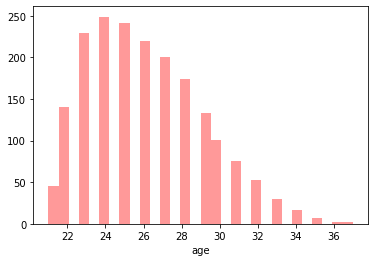

In [77]:
sns.distplot(running_backs['age'],bins=30,kde=False,color='red')

In [81]:
running_backs["ydsperage"] = running_backs["yards"] / running_backs["age"]

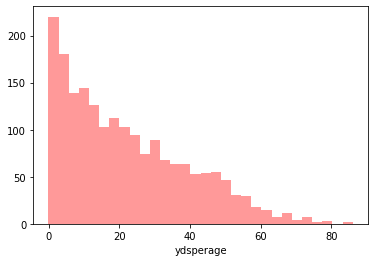

In [82]:
sns.distplot(running_backs['ydsperage'],bins=30,kde=False,color='red')

In [83]:
running_backs.drop("ydsperage", axis=1)

,Unnamed: 0,playerid,year,playername,team,age,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
0,0,AAbduAm00,2020,Ameer Abdullah,MIN,27,6,0,2,7,0,4,3.5,1.2,0
1,1,AAbduAm00,2019,Ameer Abdullah,MIN,26,16,0,23,115,0,15,5.0,7.2,1
2,2,AAbduAm00,2017,Ameer Abdullah,DET,24,14,11,165,552,4,34,3.3,39.4,2
3,3,AAbduAm00,2016,Ameer Abdullah,DET,23,2,2,18,101,0,24,5.6,50.5,0
4,4,AAbduAm00,2015,Ameer Abdullah,DET,22,16,9,143,597,2,36,4.2,37.3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1914,ZZereAm00,2003,Amos Zereoue,PIT,27,16,6,132,433,2,22,3.3,27.1,0
1915,1915,ZZereAm00,2002,Amos Zereoue,PIT,26,16,5,193,762,4,42,3.9,47.6,2
1916,1916,ZZereAm00,2001,Amos Zereoue,PIT,25,14,0,85,441,1,32,5.2,31.5,3
1917,1917,ZZereAm00,2000,Amos Zereoue,PIT,24,12,0,6,14,0,11,2.3,1.2,0


In [84]:
career

,playerid,playername,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
23,BBarbTi00,Tiki Barber,154,109,2217,10449,55,95,4.721245,67.867532,53
344,WWillRi00,Ricky Williams,147,83,2431,10009,66,68,4.110819,68.107483,52
255,PPeteAd01,Adrian Peterson,170,158,3116,14530,113,90,4.653723,85.462353,48
121,GGoreFr00,Frank Gore,233,210,3634,15657,79,80,4.299560,67.196137,46
167,JJameEd00,Edgerrin James,148,135,3028,12246,80,72,4.046731,82.739189,44
...,...,...,...,...,...,...,...,...,...,...,...
109,FFuamCh00,Chris Fuamatu-Ma'afala,63,7,226,960,8,46,4.264159,15.249206,0
114,GGaskMy00,Myles Gaskin,13,4,118,473,2,27,3.977966,36.400000,0
312,TTaylJo02,Jonathan Taylor,6,5,89,367,3,21,4.100000,61.200000,0
190,KKellRo00,Robert Kelley,22,16,230,898,9,66,3.903478,40.790909,0


In [88]:
career= combined_players

In [89]:
career

,playerid,playername,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
0,AAbduAm00,Ameer Abdullah,54,22,351,1372,6,36,3.897151,25.403704,8
1,AAbduKa00,Karim Abdul-Jabbar,60,52,1003,3413,33,45,3.415852,56.903333,9
2,AAdamJo03,Josh Adams,19,5,131,531,4,29,4.092366,27.947368,1
3,AAddaJo00,Joseph Addai,78,60,1095,4453,39,46,4.077626,57.103846,7
4,AAjayJa00,Jay Ajayi,45,23,572,2546,13,71,4.455070,56.595556,8
...,...,...,...,...,...,...,...,...,...,...,...
345,WWilsJe01,Jeff Wilson,22,3,131,534,8,25,4.066412,24.272727,3
346,YYeldT.00,T.J. Yeldon,60,30,492,2005,6,58,4.101423,33.428333,7
347,YYounDa01,Darrel Young,45,20,27,73,6,19,2.688889,1.635556,1
348,YYounSe00,Selvin Young,23,13,201,1032,2,50,5.139303,44.878261,3


In [97]:
running_backs.drop("ydsperage", axis=1)
goodrbs = running_backs[running_backs['yards'] >500].copy()

In [99]:
goodrbs.drop("ydsperage", axis=1)

,Unnamed: 0,playerid,year,playername,team,age,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles
2,2,AAbduAm00,2017,Ameer Abdullah,DET,24,14,11,165,552,4,34,3.3,39.4,2
4,4,AAbduAm00,2015,Ameer Abdullah,DET,22,16,9,143,597,2,36,4.2,37.3,5
6,6,AAbduKa00,1998,Karim Abdul-Jabbar,MIA,24,15,15,270,960,6,45,3.6,64.0,2
7,7,AAbduKa00,1997,Karim Abdul-Jabbar,MIA,23,16,14,283,892,15,22,3.2,55.8,3
8,8,AAbduKa00,1996,Karim Abdul-Jabbar,MIA,22,16,14,307,1116,11,29,3.6,69.8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,1896,WWillRi00,2000,Ricky Williams,NOR,23,10,10,248,1000,8,26,4.0,100.0,6
1897,1897,WWillRi00,1999,Ricky Williams,NOR,22,12,12,253,884,2,25,3.5,73.7,6
1906,1906,YYeldT.00,2015,T.J. Yeldon,JAX,22,12,12,182,740,2,45,4.1,61.7,0
1911,1911,YYounSe00,2007,Selvin Young,DEN,24,15,8,140,729,1,50,5.2,48.6,2


In [100]:
goodrbs

,Unnamed: 0,playerid,year,playername,team,age,g,gs,attempts,yards,tds,longgain,yardsperatt,yardspergame,fumbles,ydsperage
2,2,AAbduAm00,2017,Ameer Abdullah,DET,24,14,11,165,552,4,34,3.3,39.4,2,23.000000
4,4,AAbduAm00,2015,Ameer Abdullah,DET,22,16,9,143,597,2,36,4.2,37.3,5,27.136364
6,6,AAbduKa00,1998,Karim Abdul-Jabbar,MIA,24,15,15,270,960,6,45,3.6,64.0,2,40.000000
7,7,AAbduKa00,1997,Karim Abdul-Jabbar,MIA,23,16,14,283,892,15,22,3.2,55.8,3,38.782609
8,8,AAbduKa00,1996,Karim Abdul-Jabbar,MIA,22,16,14,307,1116,11,29,3.6,69.8,4,50.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896,1896,WWillRi00,2000,Ricky Williams,NOR,23,10,10,248,1000,8,26,4.0,100.0,6,43.478261
1897,1897,WWillRi00,1999,Ricky Williams,NOR,22,12,12,253,884,2,25,3.5,73.7,6,40.181818
1906,1906,YYeldT.00,2015,T.J. Yeldon,JAX,22,12,12,182,740,2,45,4.1,61.7,0,33.636364
1911,1911,YYounSe00,2007,Selvin Young,DEN,24,15,8,140,729,1,50,5.2,48.6,2,30.375000


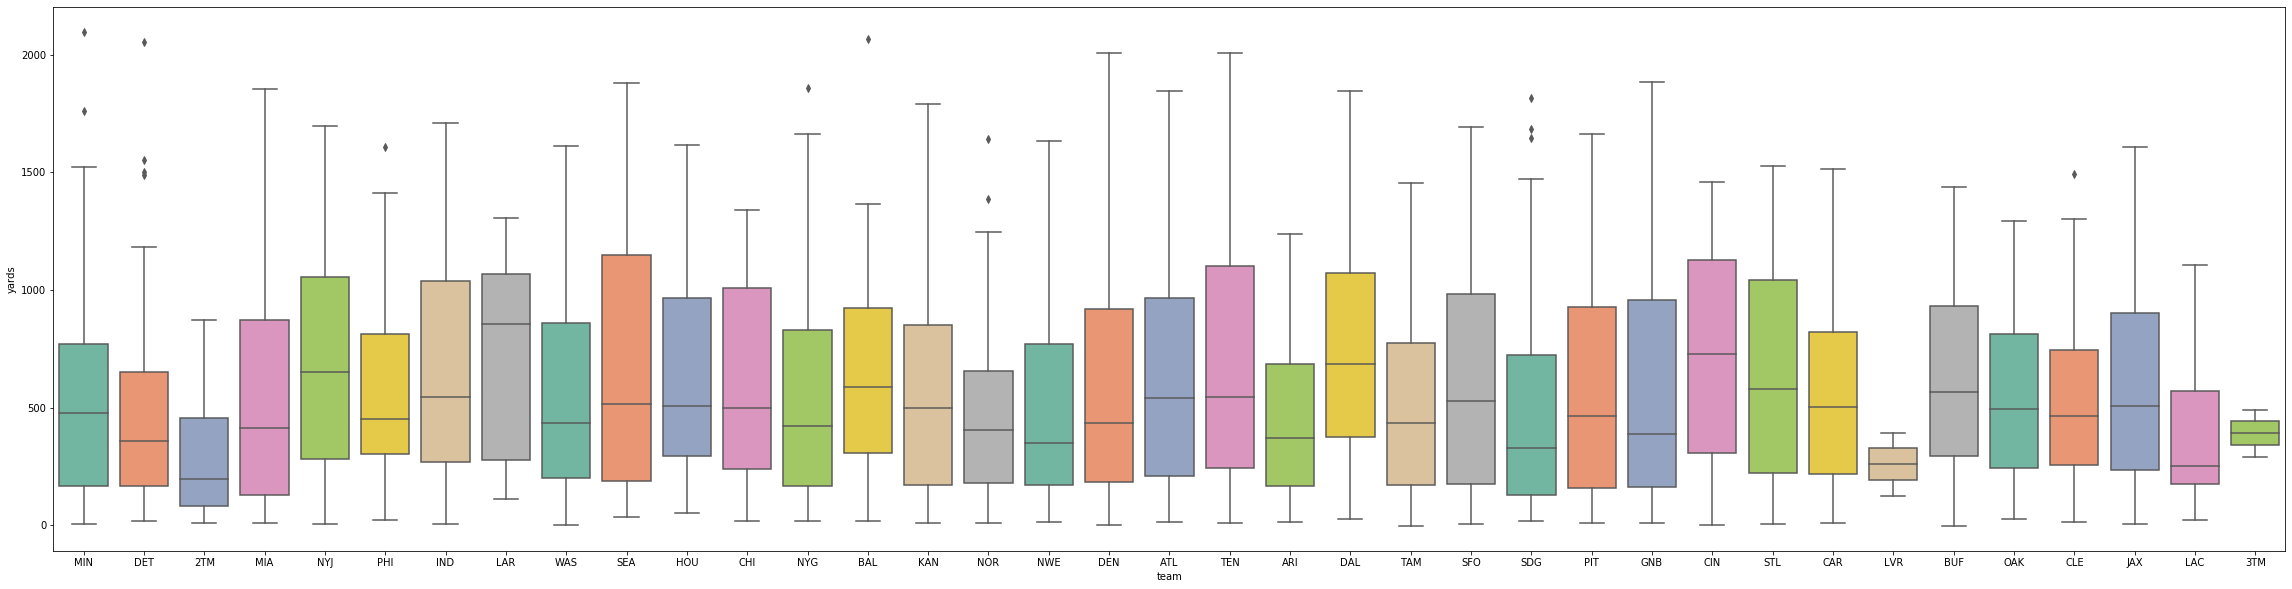

In [113]:
plt.figure(figsize=(40,10))
sns.boxplot(x='team',y='yards',data=running_backs,palette='Set2')


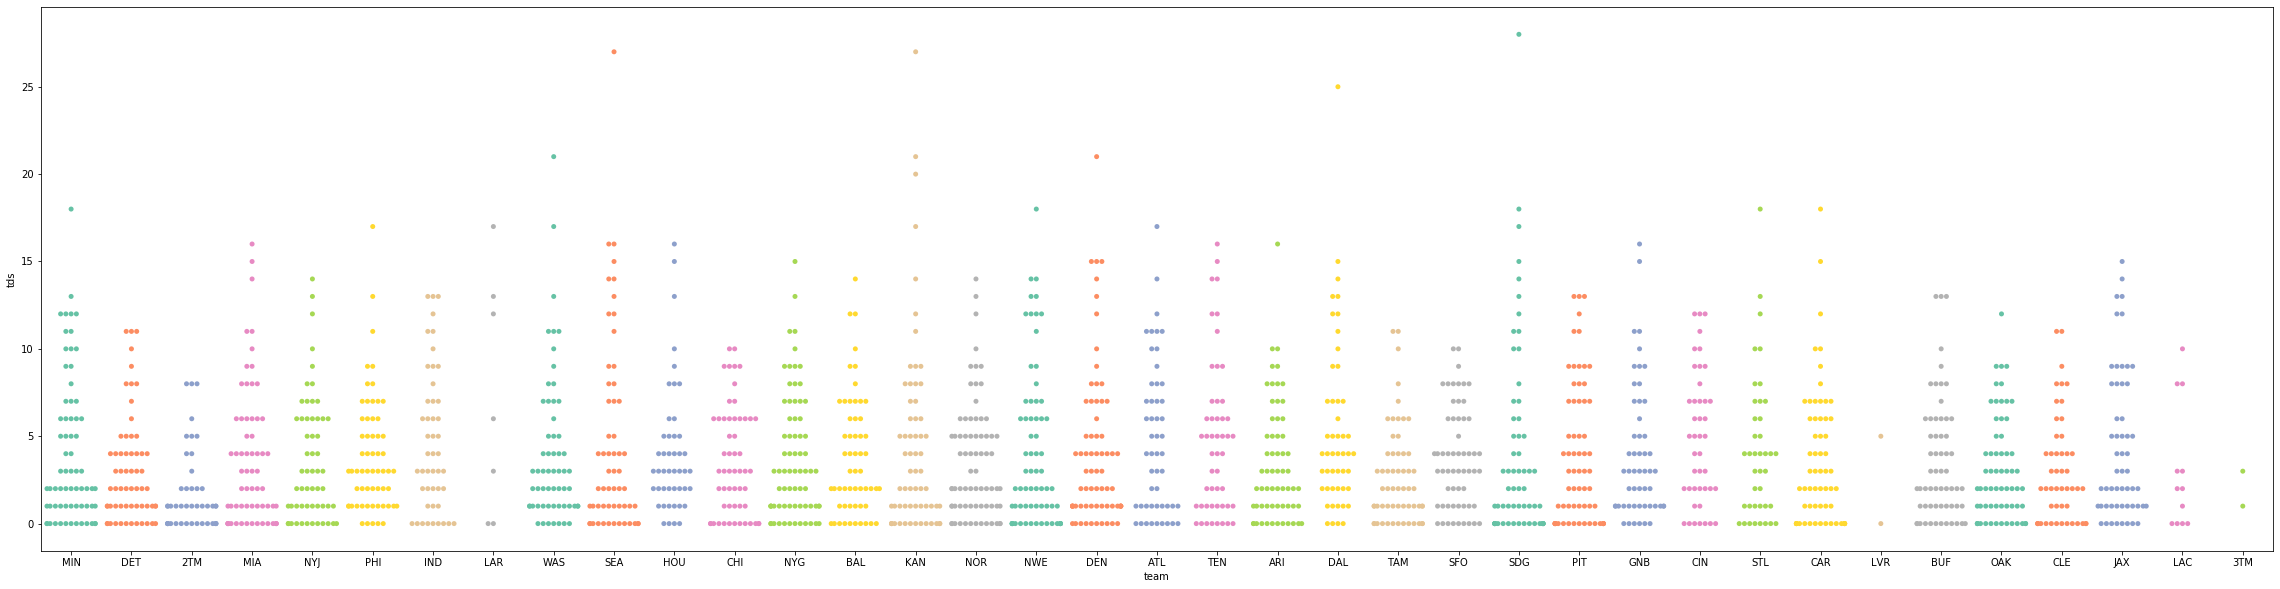

In [112]:
plt.figure(figsize=(40,10))
sns.swarmplot(x='team',y='tds',data=running_backs,palette='Set2')

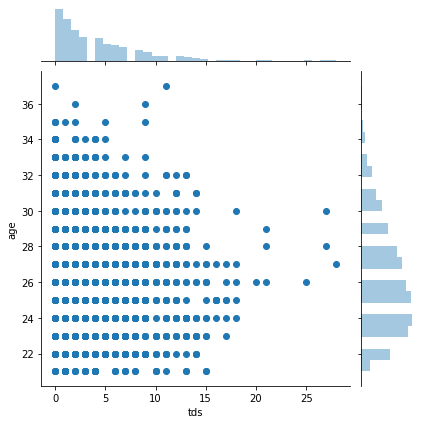

In [115]:
sns.jointplot(x='tds',y='age',data=running_backs)

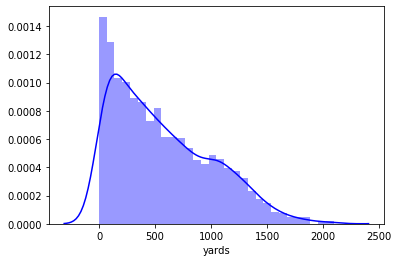

In [122]:
sns.distplot(running_backs['yards'],bins=30,kde=True,color='blue')